# Named Entity Recognition

Named Entity Recognition or NER for short is a natural language processing task used to identify important named entities in the text -- such as people, places and organizations -- they can even be dates, states, works of art and other categories depending on the libraries and notation you use. NER can be used alongside topic identification, or on its own to determine important items in a text or answer basic natural language understanding questions such as who? what? when and where?

## Using nltk for Named Entity Recognition

We can use the built-in named entity recognition with NLTK. To do so, we take a normal sentence, and preprocess it via tokenization. Then, we can tag the sentence for parts of speech. This will add tags for proper nouns, pronouns, adjective, verbs and other part of speech that NLTK uses based on an english grammar.

In [1]:
article = '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'

In [2]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [9]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


Here, we'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles. Note that the object `article` is not in workspace so, the output will not be visible.

<ipython-input-12-3c349c84014c>:19: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)


([], [], [])

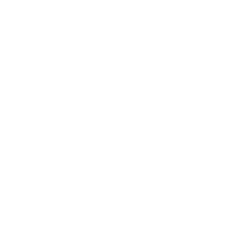

In [12]:
# Create the defaultdict: ner_categories
from collections import defaultdict
from matplotlib import pyplot as plt
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)


## SpaCy

![](img/03_01.png "SpaCy")

SpaCy is a NLP library similar to Gensim, but with different implementations, including a particular focus on creating NLP pipelines to generate models and corpora. SpaCy is open-source and has several extra libraries and tools built by the same team, including `Displacy` - a visualization tool for viewing parse trees which uses Node-js to create interactive text.